In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_full = pd.read_csv('/content/drive/MyDrive/Sentiment model based on phones review/phones.csv')

In [ ]:
df_full.head(5)

,Review,Rating
0,3D Touch просто восхитительная вещь! Заряд дер...,5
1,"Отключается при температуре близкой к нулю, не...",4
2,"В Apple окончательно решили не заморачиваться,...",3
3,Постарался наиболее ёмко и коротко описать все...,4
4,Достойный телефон. Пользоваться одно удовольст...,5


In [ ]:
df_full['Rating'].value_counts()

5    228517
4    106568
3     53091
2     35724
1     34529
0         2
9         1
7         1
Name: Rating, dtype: int64

In [ ]:
df_full = df_full.drop(df_full[df_full.Rating < 1].index)
df_full = df_full.drop(df_full[df_full.Rating > 5].index)

In [ ]:
df_full['Rating'].value_counts()

5    228517
4    106568
3     53091
2     35724
1     34529
Name: Rating, dtype: int64

In [ ]:
df_extended = pd.read_csv('/content/drive/MyDrive/Sentiment model based on phones review/all_data.csv')

In [ ]:
df_extended = df_extended.drop(columns=['date_time', 'color', 'size', 'thumb_up', 'thumb_down', 'prod', 'brand']).rename(columns={'comment':'Review', 'prod_eval':'Rating'})

In [ ]:
df_extended

,Review,Rating
0,👍💣🔥 очень рада приобретению просто класс.,5
1,"Покупала себе, теперь заказала маме в подарок....",5
2,"Очень понравился дозатор. Быстро собрали, ниче...",5
3,Дозатор пришел целый. В комплекте было батарей...,5
4,"Пользуемся давно, афигенный дозатор, все гости...",5
...,...,...
218554,"Прочитав отзывы , заказала именно этот браслет...",3
218555,с фигурой мальчика ли придёт? Не путайте людей...,3
218556,"Уважаемый магазин! Поймите, что люди, заказыва...",1
218557,У меня тоже самое . Заказывала 2 браслета с ма...,1


In [ ]:
df_extended['Rating'].value_counts()

5    171131
1     16022
4     14504
3     10650
2      6252
Name: Rating, dtype: int64

In [ ]:
df = pd.concat([df_full, df_extended])
df = df.reset_index().drop(columns='index')
df

,Review,Rating
0,3D Touch просто восхитительная вещь! Заряд дер...,5
1,"Отключается при температуре близкой к нулю, не...",4
2,"В Apple окончательно решили не заморачиваться,...",3
3,Постарался наиболее ёмко и коротко описать все...,4
4,Достойный телефон. Пользоваться одно удовольст...,5
...,...,...
676983,"Прочитав отзывы , заказала именно этот браслет...",3
676984,с фигурой мальчика ли придёт? Не путайте людей...,3
676985,"Уважаемый магазин! Поймите, что люди, заказыва...",1
676986,У меня тоже самое . Заказывала 2 браслета с ма...,1


In [ ]:
df['Review'] = df['Review'].astype('str')

In [ ]:
df['Sentiment'] = np.where(df['Rating'] >= 4, 'Positive', 'Negative')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['Sentiment'])
df

,Review,Rating,Sentiment,sentiment_encoded
0,3D Touch просто восхитительная вещь! Заряд дер...,5,Positive,1
1,"Отключается при температуре близкой к нулю, не...",4,Positive,1
2,"В Apple окончательно решили не заморачиваться,...",3,Negative,0
3,Постарался наиболее ёмко и коротко описать все...,4,Positive,1
4,Достойный телефон. Пользоваться одно удовольст...,5,Positive,1
...,...,...,...,...
676983,"Прочитав отзывы , заказала именно этот браслет...",3,Negative,0
676984,с фигурой мальчика ли придёт? Не путайте людей...,3,Negative,0
676985,"Уважаемый магазин! Поймите, что люди, заказыва...",1,Negative,0
676986,У меня тоже самое . Заказывала 2 браслета с ма...,1,Negative,0


In [ ]:
df_wo_dup = df.drop_duplicates().reset_index().drop('index', axis = 1)

In [ ]:
df_wo_dup

,Review,Rating,Sentiment,sentiment_encoded
0,3D Touch просто восхитительная вещь! Заряд дер...,5,Positive,1
1,"Отключается при температуре близкой к нулю, не...",4,Positive,1
2,"В Apple окончательно решили не заморачиваться,...",3,Negative,0
3,Постарался наиболее ёмко и коротко описать все...,4,Positive,1
4,Достойный телефон. Пользоваться одно удовольст...,5,Positive,1
...,...,...,...,...
510920,"Прочитав отзывы , заказала именно этот браслет...",3,Negative,0
510921,с фигурой мальчика ли придёт? Не путайте людей...,3,Negative,0
510922,"Уважаемый магазин! Поймите, что люди, заказыва...",1,Negative,0
510923,У меня тоже самое . Заказывала 2 браслета с ма...,1,Negative,0


In [ ]:
df_wo_dup['Sentiment'].value_counts()

Positive    395855
Negative    115070
Name: Sentiment, dtype: int64

In [ ]:
text = df_wo_dup['Review']
print(df_wo_dup.shape)
text.head(3)

(510925, 4)


0    3D Touch просто восхитительная вещь! Заряд дер...
1    Отключается при температуре близкой к нулю, не...
2    В Apple окончательно решили не заморачиваться,...
Name: Review, dtype: object

In [ ]:
wn_lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatized_text = []
for review in text:
    lemmatized_text.append(' '.join([wn_lemmatizer.lemmatize(word) for word in review.split()]))

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
for i in range(len(lemmatized_text)):
  lemmatized_text[i] = word_tokenize(lemmatized_text[i])

In [ ]:
len(lemmatized_text)

510925

In [ ]:
clean_tokenized_review = [] 
for i, element in enumerate(lemmatized_text):
    if i % 2000 == 0: print(i, end = ' ')
    clean_tokenized_review.append(' '.join([word for word in element]))

0 2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 22000 24000 26000 28000 30000 32000 34000 36000 38000 40000 42000 44000 46000 48000 50000 52000 54000 56000 58000 60000 62000 64000 66000 68000 70000 72000 74000 76000 78000 80000 82000 84000 86000 88000 90000 92000 94000 96000 98000 100000 102000 104000 106000 108000 110000 112000 114000 116000 118000 120000 122000 124000 126000 128000 130000 132000 134000 136000 138000 140000 142000 144000 146000 148000 150000 152000 154000 156000 158000 160000 162000 164000 166000 168000 170000 172000 174000 176000 178000 180000 182000 184000 186000 188000 190000 192000 194000 196000 198000 200000 202000 204000 206000 208000 210000 212000 214000 216000 218000 220000 222000 224000 226000 228000 230000 232000 234000 236000 238000 240000 242000 244000 246000 248000 250000 252000 254000 256000 258000 260000 262000 264000 266000 268000 270000 272000 274000 276000 278000 280000 282000 284000 286000 288000 290000 292000 294000 296000 298000 300000 3

In [ ]:
new_review = pd.Series(clean_tokenized_review)
new_review

0         3D Touch просто восхитительная вещь ! Заряд де...
1         Отключается при температуре близкой к нулю , н...
2         В Apple окончательно решили не заморачиваться ...
3         Постарался наиболее ёмко и коротко описать все...
4         Достойный телефон . Пользоваться одно удовольс...
                                ...                        
510920    Прочитав отзывы , заказала именно этот браслет...
510921    с фигурой мальчика ли придёт ? Не путайте люде...
510922    Уважаемый магазин ! Поймите , что люди , заказ...
510923    У меня тоже самое . Заказывала 2 браслета с ма...
510924    Заказывала браслет с мальчиком , привезли дево...
Length: 510925, dtype: object

In [ ]:
df_cleaned = pd.concat([new_review, df_wo_dup.sentiment_encoded], axis=1)

In [ ]:
df_cleaned_renamed = df_cleaned.rename(columns={0:'Review', 'sentiment_encoded':'Sentiment'})
df_cleaned_renamed

,Review,Sentiment
0,3D Touch просто восхитительная вещь ! Заряд де...,1
1,"Отключается при температуре близкой к нулю , н...",1
2,В Apple окончательно решили не заморачиваться ...,0
3,Постарался наиболее ёмко и коротко описать все...,1
4,Достойный телефон . Пользоваться одно удовольс...,1
...,...,...
510920,"Прочитав отзывы , заказала именно этот браслет...",0
510921,с фигурой мальчика ли придёт ? Не путайте люде...,0
510922,"Уважаемый магазин ! Поймите , что люди , заказ...",0
510923,У меня тоже самое . Заказывала 2 браслета с ма...,0


In [ ]:
from sklearn.model_selection import train_test_split

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(df_cleaned_renamed.Review, df_cleaned_renamed.Sentiment, test_size = 0.15)

In [ ]:
BATCH_SIZE = 64

In [ ]:
VOCAB_SIZE = 30000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(x_train.values)

In [ ]:
vocab = np.array(encoder.get_vocabulary())

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, )),
    tf.keras.layers.Dense(64, activation='relu'),

    #Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy', tf.keras.metrics.BinaryAccuracy(), 
                       f1_m, recall_m, precision_m
                       ])

In [ ]:
history = model.fit(x=x_train, y=y_train, validation_data=(x_valid, y_valid), epochs=2)

Epoch 1/2
13572/13572 [==============================] - 1360s 100ms/step - loss: 0.1161 - accuracy: 0.9555 - binary_accuracy: 0.9555 - f1_m: 0.9708 - recall_m: 0.9744 - precision_m: 0.9683 - val_loss: 0.2498 - val_accuracy: 0.9102 - val_binary_accuracy: 0.9102 - val_f1_m: 0.9410 - val_recall_m: 0.9432 - val_precision_m: 0.9411
Epoch 2/2
13572/13572 [==============================] - 1328s 98ms/step - loss: 0.0842 - accuracy: 0.9682 - binary_accuracy: 0.9682 - f1_m: 0.9791 - recall_m: 0.9816 - precision_m: 0.9775 - val_loss: 0.2710 - val_accuracy: 0.9094 - val_binary_accuracy: 0.9094 - val_f1_m: 0.9406 - val_recall_m: 0.9435 - val_precision_m: 0.9398


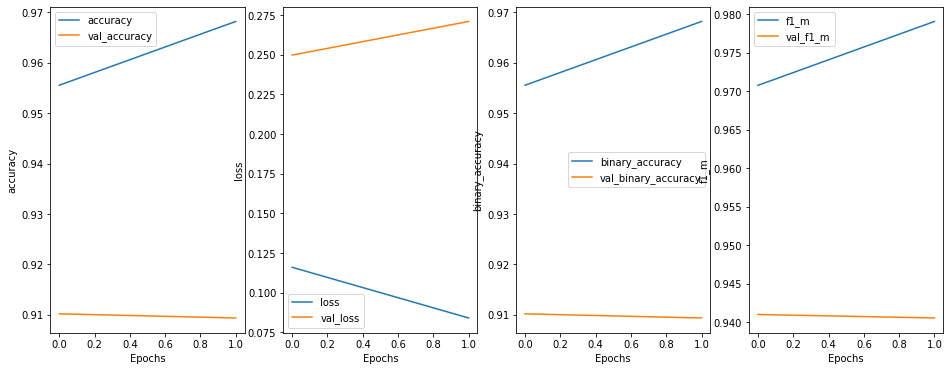

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 4, 2)
plot_graphs(history, 'loss')
plt.subplot(1, 4, 3)
plot_graphs(history, 'binary_accuracy')
plt.subplot(1, 4, 4)
plot_graphs(history, 'f1_m')

In [ ]:
model.save('/content/drive/MyDrive/Sentiment model based on phones review/Model_full_extended_final')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sentiment model based on phones review/Model_full_extended_final/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sentiment model based on phones review/Model_full_extended_final/assets
